# Introduction to ehrapy

In [1]:
from IPython.display import Image

Welcome to ehrapy! 
ehrapy is a framework for exploratory end-to-end analysis of complex EHR datasets inspired by the single-cell world.
Hereby, data points are not necessarily treated as complete patients, but as patient visits representing snapshots of the underlying system.
The goal of any exploratory analysis not necessarily to predict or classify a specific state, but to understand the fundamental system underlying the data manifold.

ehrapy is not a pure machine learning library or a pure statistical library, but a toolbox providing simplified access to fundamental algorithms in representation learning.

## Fundamental Principles

ehrapy borrows a lot from the single-cell world and the [scverse](https://github.com/scverse/) ecosystem. Notably, ehrapy is using the same data structure (AnnData) and many of the fundamental algorithms (scanpy). Both are briefly introduced in the following subsections.

## AnnData

AnnData is short for Annotated Data and is the primary data structure used within ehrapy. Technically described, it is a Python package for handling annotated data matrices in memory and on disk, positioned between pandas and xarray. anndata offers a broad range of computationally efficient features including, among others, sparse data support, lazy operations, and a PyTorch interface. From a users perspective, it is based on the idea of a primary 2D matrix X of dimensions n_patient_visits x n_features. The patient visits are also our observations (obs) and the features our variables (var). AnnData allows us to annotate this matrix either with respect to the observations or the variables. Furthermore, AnnData allows for the addition of graph like structures (obsp, varp) and further structured (obsm, varm) and unstructed matrices (uns) to be saved within the same object. These can than be readily used for various machine learning algorithms.

Visualized it looks like this:

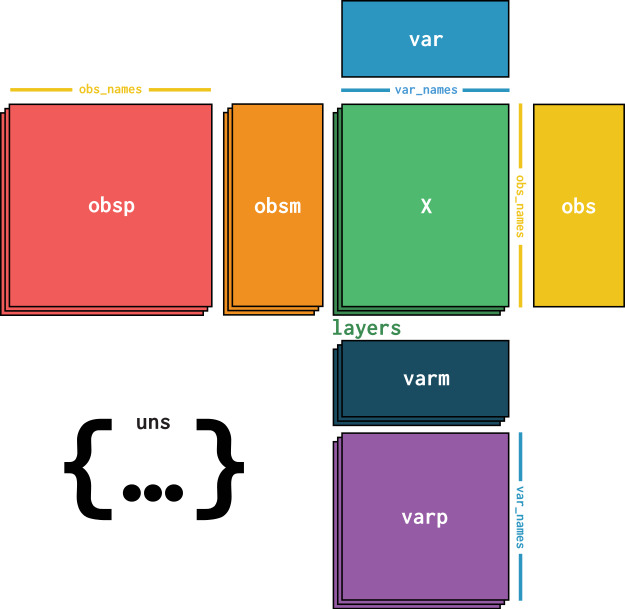

In [35]:
Image(filename="images/anndata_schema.jpg", width=800)

Let us create an example AnnData object as it may be used in ehrapy.

In [9]:
import anndata as ad
import pandas as pd

After importing the required packages we create an example dataset with a **patient_visit_id** and some features such as **age**, **b12_level** and **d3_level**. We further add a **service_unit** column which we do not want to include as data for our algorithms, but only as annotations.

In [17]:
data = {
    "patient_visit_id": [0, 1, 2],
    "age": [59, 24, 64],
    "b12_level": [560, 201, 450],
    "d3_level": [25, 19, 50],
    "service_unit": ["NY", "NY", "BO"],
}
df = pd.DataFrame(data)

In [18]:
df

,patient_visit_id,age,b12_level,d3_level,service_unit
0,0,59,560,25,NY
1,1,24,201,19,NY
2,2,64,450,50,BO


Next, we import ehrapy and create an AnnData object based on this Pandas DataFrame. Usually, EHR data comes in the form of e.g. csv tables which can be directly read into ehrapy as well, but for the sake of this example we transform an existing Pandas DataFrame into an AnnData object using the **df_to_anndata** function. Note that it has a **patient_visit_id** parameter to set the index and a **columns_obs_only** parameter which denotes features which should not be a part of X but of obs. This will allow us to e.g. color plots by **service_unit**, but not to use these values for algorithms.

In [19]:
import ehrapy as ep

In [20]:
adata = ep.ad.df_to_anndata(
    df, index_column="patient_visit_id", columns_obs_only=["service_unit"]
)

In [22]:
adata

AnnData object with n_obs × n_vars = 3 × 3
    obs: 'service_unit'
    uns: 'numerical_columns', 'non_numerical_columns'
    layers: 'original'

Examining our AnnData object we notice that it has a matrix of size 3 x 3 which correspond to our age, B12 and D3 measurements.

In [23]:
adata.obs

,service_unit
patient_visit_id,
0,NY
1,NY
2,BO


Furthermore, our **obs** has the service unit as expected. The AnnData object also has data in the **uns** (unstructured) slot which denotes which columns are numerical columns and which ones aren't. This may be required for specific algorithms.

In [24]:
adata.uns

OverloadedDict, wrapping:
	OrderedDict([('numerical_columns', ['age', 'b12_level', 'd3_level']), ('non_numerical_columns', [])])
With overloaded keys:
	['neighbors'].

Finally, the **layers** slot of our object saves all original values when the object was created. We will constantly modify our X when applying algorithms to our object (e.g. scaling) and this layer is a copy of our original X which will allow us to e.g. scale the age, but use the original values when coloring a UMAP plot.

In [27]:
adata.layers["original"]

array([[ 59, 560,  25],
       [ 24, 201,  19],
       [ 64, 450,  50]])

For more details please examine the [AnnData documentation](https://anndata.readthedocs.io/en/latest/) and the [AnnData paper](https://www.biorxiv.org/content/10.1101/2021.12.16.473007v1).

## scanpy

[scanpy](https://github.com/theislab/scanpy/) is a framework for the analysis of single-cell data and ehrapy heavily builds upon it. While some of the implemented algorithms are single-cell specific (e.g. the **highly_variable_genes** function), many can be applied to any data (e.g. PCA or UMAP). These are wrapped in ehrapy to ensure that they are easily accessible and implemented in a fast and scalable way.

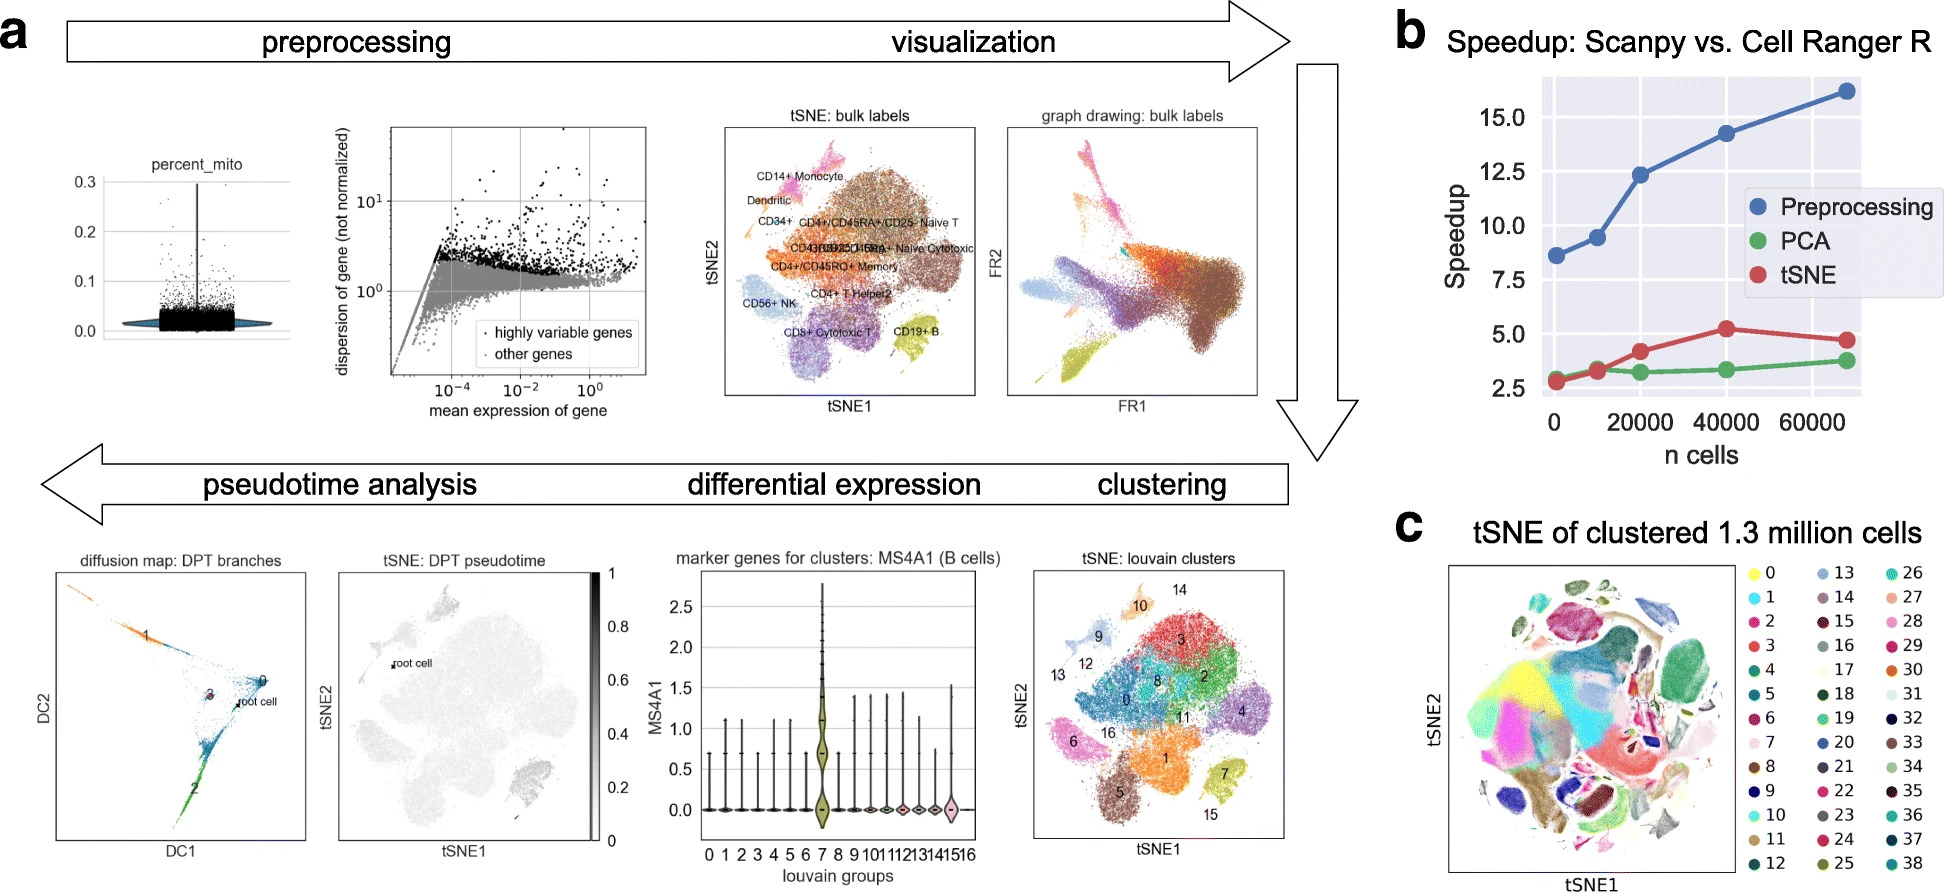

In [34]:
Image(filename="images/scanpy.jpg", width=800)

Just like scanpy, ehrapy follows the same API patterns of preprocessing (pp), tools (tl) and plots (pl). Hence, the various functions from scanpy like **scanpy.tl.umap** can be used from ehrapy in a similar fashion: **ep.tl.umap**.

The documentation of ehrapy tries to hide as many details from the here not important single-cell world as possible, but you may see the termes cell, gene or expression pop up somewhere.

However, the tight integration of AnnData and scanpy into ehrapy also allows for the joint analysis of omics data and EHR data. We will provide a vignette for this as well in the future.

To learn more about scanpy please read the [scanpy documentation ](https://scanpy.readthedocs.io/en/stable/) and the [scanpy paper ](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1382-0).

## ehrapy

Now that we've covered the basics of AnnData and scanpy and we have an example dataset we can apply some of ehrapy's tools on it.
We will start by calculating and visualizing a PCA on our data.

In [36]:
ep.pp.pca(adata)

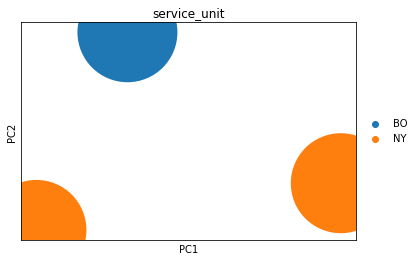

In [38]:
ep.pl.pca(adata, color="service_unit")

This is of course not a useful analysis since we only have three visits.

Here will soon be a figure explaining the workflow of ehrapy in detail. Stay tuned.

To get started check out the [MIMIC-II introduction tutorial](https://ehrapy.readthedocs.io/en/latest/tutorials/notebooks/mimic_2_introduction.html) where you will learn to apply ehrapy to a real dataset to investigate the effect of intdwelling artherical catheters on patient survival over multiple notebooks.